## Пороговая обработка дисперсии числовых признаков

Считаем дисперсию по фичам и отбираем по порогу

Минусы:
* Фичи должны быть одной размерности
* Фичи должны быть в одних единицах измерения

In [1]:
# Используется from sklearn.feature_selection import VarianceThreshold

## Пороговая обработка дисперсии бинарных признаков

In [2]:
# Считается аналогично предыдущему пункту только для бинарных признаков

# Var(x) = p(1-p) где p - доля наблюдений класса 1

## Обработка высококоррелированных признаков

Для сильнокоррелированных признаков создаем корреляционную матрицу (для каждого признака попарно считаем корреляцию) и удаляем по одному признаку с корреляцией больше порога

## Удаление нерелевантных признаков для классификации

Для категориальных признаков вычисляется показатель хи-квадрат между признаком и вектором целей
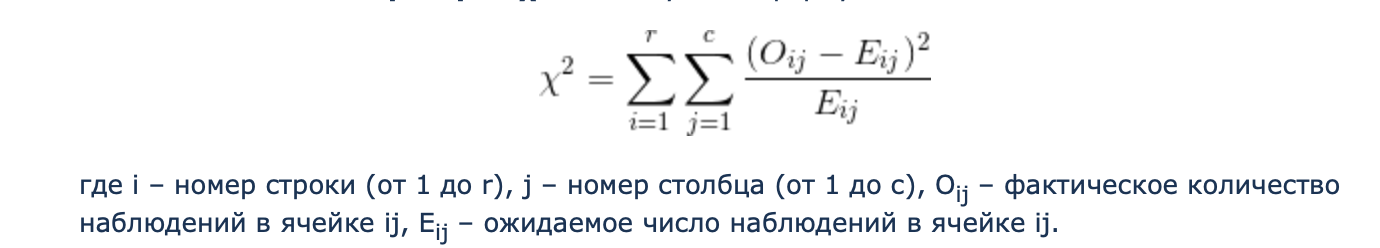
метод позволяет оценить статистическую значимость различий двух или нескольких относительных показателей (частот, долей)

In [8]:
import warnings
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFECV
from sklearn import datasets, linear_model

warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelds")

features, target = make_regression(n_samples=10000,
                                  n_features=100,
                                  n_informative=2,
                                  random_state=1)

ols = linear_model.LinearRegression()




In [27]:
frecv = RFECV(estimator=ols, step = 1, scoring="neg_mean_squared_error", n_jobs=3, verbose = True)
frecv.fit(features,target)
frecv.transform(features)

Fitting estimator with 100 features.
Fitting estimator with 99 features.
Fitting estimator with 98 features.
Fitting estimator with 97 features.
Fitting estimator with 96 features.
Fitting estimator with 95 features.
Fitting estimator with 94 features.
Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 f

Fitting estimator with 100 features.
Fitting estimator with 99 features.
Fitting estimator with 98 features.
Fitting estimator with 97 features.
Fitting estimator with 96 features.
Fitting estimator with 95 features.
Fitting estimator with 94 features.
Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 f

array([[ 0.00850799,  0.009944  ,  0.7031277 ,  0.28275566, -1.15861018],
       [-1.07500204,  0.04996652,  2.56148527,  0.05847771,  0.42556217],
       [ 1.37940721, -0.55102204, -1.77039484, -0.30961301,  0.70017292],
       ...,
       [-0.80331656,  1.22981262, -1.60648007,  0.2169738 ,  0.44188555],
       [ 0.39508844, -1.14347573, -1.34564911,  0.4675537 , -0.74637847],
       [-0.55383035, -1.39387381,  0.82880112, -0.23895986, -0.1457644 ]])

In [28]:
frecv.n_features_

5

In [4]:
frecv.support_

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [5]:
frecv.ranking_

array([60, 68, 47, 83, 66,  1, 90,  7, 35, 13, 89, 69, 36, 20, 23,  1, 93,
       44, 46, 15, 39, 27, 32, 55, 65, 19, 61, 10,  9, 85, 79, 54, 59, 76,
       31,  2, 30, 52, 77,  1, 58, 84, 26, 95, 40, 34, 91, 86, 25, 71, 45,
       43,  1, 48, 72, 87, 62, 56, 88, 28, 64, 24, 82, 74, 92, 17, 63, 41,
       12,  1, 29, 67, 96,  4, 57, 33, 21, 16, 80, 22, 42, 37,  5, 78, 94,
       14,  8, 75, 51, 50, 81, 38, 53,  3, 18, 70, 11,  6, 73, 49])

In [6]:
frecv.cv_results_

{'mean_test_score': array([-1.47497934e+03, -3.52043763e-26, -3.35697663e-26, -3.41755792e-26,
        -2.43450696e-26, -3.43936161e-26, -3.79218885e-26, -4.16980889e-26,
        -3.17534715e-26, -5.57248825e-26, -4.13046429e-26, -3.93243849e-26,
        -3.80470763e-26, -3.58553374e-26, -3.93251398e-26, -4.13370035e-26,
        -4.29632379e-26, -1.00224292e-25, -4.43485317e-26, -6.62995263e-26,
        -3.82703610e-26, -2.86597829e-26, -4.31312802e-26, -5.13940743e-26,
        -4.84386421e-26, -4.91409711e-26, -5.47899377e-26, -5.41110824e-26,
        -4.42732092e-26, -5.46043448e-26, -4.04501501e-26, -5.53721748e-26,
        -5.44665575e-26, -5.28848801e-26, -4.86773627e-26, -4.07860829e-26,
        -8.14837061e-26, -6.68282962e-26, -8.86430031e-26, -9.13802001e-26,
        -5.61766921e-26, -5.78518065e-26, -4.21126970e-26, -6.03790897e-26,
        -7.35897943e-26, -7.04893870e-26, -6.02491812e-26, -4.34468681e-26,
        -6.09340370e-26, -5.09734324e-26, -5.85118905e-26, -5.7775226

In [7]:
from sklearn.metrics import mean_squared_error

features

array([[-0.64280735, -0.76165969, -0.21101598, ..., -0.09009697,
        -0.465717  ,  0.57708925],
       [ 1.3445917 , -0.46550514, -0.35861939, ..., -0.83288561,
        -0.80204139,  0.23866708],
       [-0.8296151 ,  1.36836958,  0.72194912, ..., -0.19323117,
         0.61859301,  0.56851734],
       ...,
       [ 0.07312981,  0.39023196, -0.19507822, ...,  0.16783823,
        -1.44486423,  0.80140047],
       [-0.59308625,  0.44825266, -0.75444722, ..., -0.23055945,
         1.83227846, -0.31107328],
       [ 0.94761575,  1.15616404, -0.10539287, ...,  0.05952898,
        -0.12939911, -1.18507119]])